In [3]:
!pip install scikit_posthocs

In [2]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=41ecb40f7bd2e723facb1fce80d1b37b91b86e2eee1af707586e7a2eea8d9079
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [4]:
import pandas as pd
import numpy as np
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import math
import scipy
import pingouin as pg
import scikit_posthocs as sp

#from google.colab import files

from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy import stats

In [ ]:
LevodopaChallengeWideClinical = pd.read_csv('LevodopaChallengeWideClinical.csv', sep = ';')


In [ ]:
LevodopaChallengeWideClinical

,patient,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,A,2,6,5,5,4,0,4,0,0,...,0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B,1,5,5,5,2,0,3,1,2,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C,1,3,5,3,2,2,3,0,0,...,0,1.0,1.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0
3,D,2,4,4,2,2,4,0,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E,2,3,3,1,2,4,0,1,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,F,3,4,4,3,4,2,4,2,4,...,1,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
6,G,3,4,4,4,2,2,3,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,H,2,4,4,4,2,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,I,1,4,4,3,1,0,0,2,3,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,J,1,3,4,4,1,0,0,0,4,...,3,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0


<AxesSubplot:>

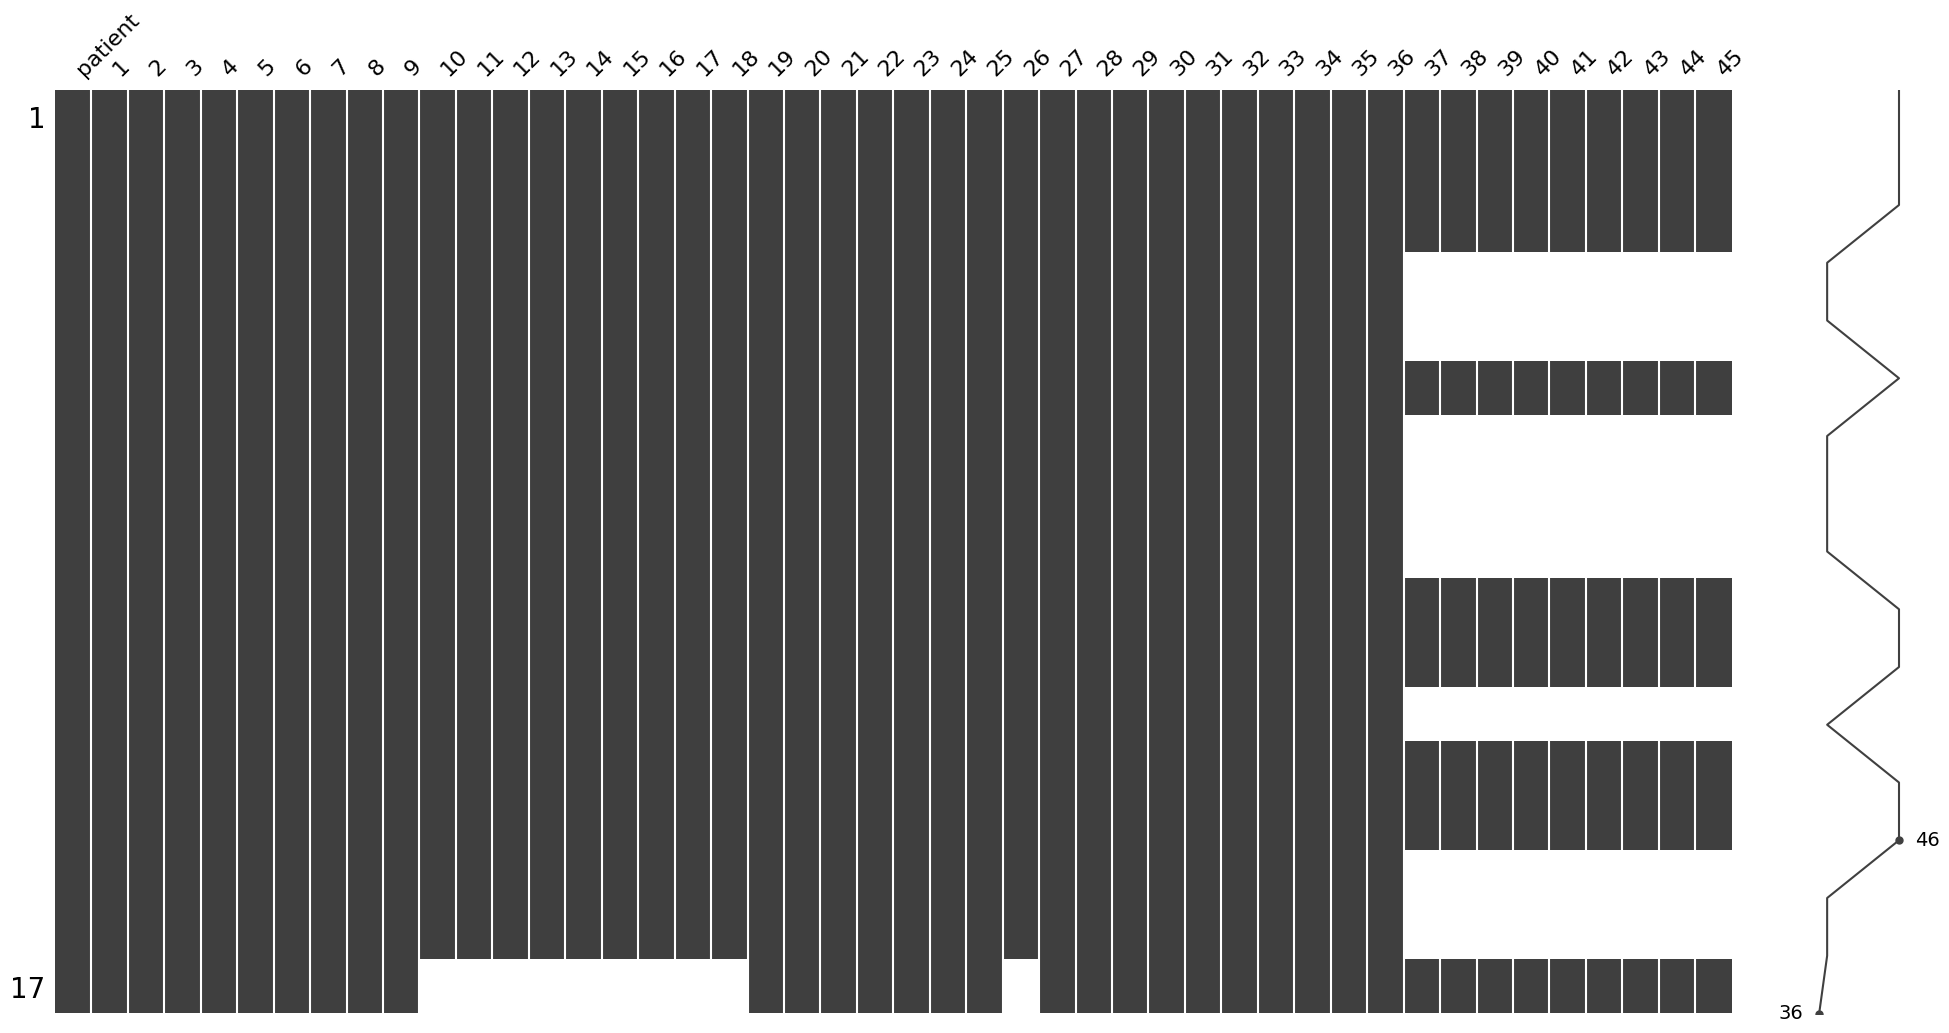

In [ ]:
mno.matrix(LevodopaChallengeWideClinical,figsize = (24,12))

In [ ]:
# Remove patient index

patid_LevodopaChallengeWideClinical = LevodopaChallengeWideClinical.iloc[:,0:1]

In [ ]:
# Select remianing, numeric variables

LevodopaChallengeWideClinical = LevodopaChallengeWideClinical.iloc[:,1:46]

In [ ]:
LevodopaChallengeWideClinical

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,2,6,5,5,4,0,4,0,0,2.0,...,0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5,5,5,2,0,3,1,2,1.0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,5,3,2,2,3,0,0,1.0,...,0,1.0,1.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2,4,4,2,2,4,0,0,1,1.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,3,3,1,2,4,0,1,1,1.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,4,4,3,4,2,4,2,4,2.0,...,1,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
6,3,4,4,4,2,2,3,0,0,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,4,4,4,2,0,0,0,0,2.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,4,4,3,1,0,0,2,3,1.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,3,4,4,1,0,0,0,4,1.0,...,3,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
missing_columns = list(LevodopaChallengeWideClinical)
missing_columns

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45']

In [ ]:
# Rename new variables
for feature in missing_columns:
    LevodopaChallengeWideClinical[feature + '_imp'] = LevodopaChallengeWideClinical[feature]
    LevodopaChallengeWideClinical = random_imputation(LevodopaChallengeWideClinical, feature)

In [ ]:
# Estimate the missing data using a regression modl

# Input estimates only (!) on the rows/colunms where the original data was missing (i.e. substitute the random numbers introduced above)

deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:

    deter_data["Det" + feature] = LevodopaChallengeWideClinical[feature + "_imp"]
    parameters = list(set(LevodopaChallengeWideClinical.columns) - set(missing_columns) - {feature + '_imp'})


    model = linear_model.LinearRegression()
    model.fit(X = LevodopaChallengeWideClinical[parameters], y = LevodopaChallengeWideClinical[feature + '_imp'])

    deter_data.loc[LevodopaChallengeWideClinical[feature].isnull(), "Det" + feature] = model.predict(LevodopaChallengeWideClinical[parameters])[LevodopaChallengeWideClinical[feature].isnull()]


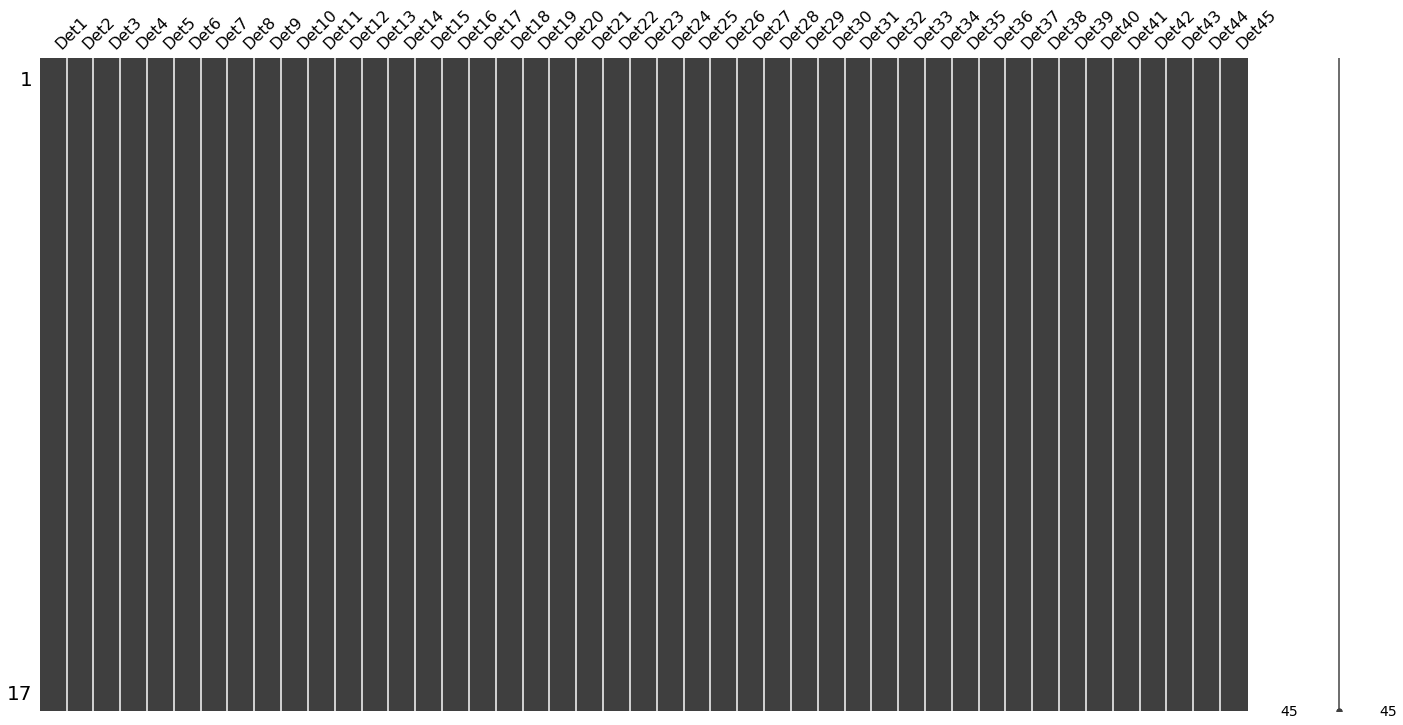

In [ ]:
mno.matrix(deter_data, figsize = (24,12))


In [ ]:
deter_data.to_csv('output_wide_clinical.csv', encoding = 'utf-8-sig')
files.download('output_wide_clinical.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
output_wide_clinical = pd.read_csv('output_wide_clinical.csv', sep = ',')

In [8]:
output_wide_clinical

,patient,Item_3.1,Item_3.3,Item_3.4,Item_3.8,Item_3.10,Item_3.11,Item_3.12,Item_3.15,Item_3.17,Short_MDS-UPDRS_III,Axial_Score,Group
0,A,2,4,4,4,3,0,3,0,0,18,7,OFF
1,B,1,4,4,4,2,0,3,1,2,16,4,OFF
2,C,1,3,4,3,2,2,3,0,0,13,6,OFF
3,D,2,3,3,2,2,3,0,0,1,13,6,OFF
4,E,2,3,3,1,2,3,0,1,1,12,6,OFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,M,3,0,4,4,2,2,0,0,0,12,5,80min
81,N,1,2,3,3,0,0,3,0,0,10,3,80min
82,O,3,0,3,0,1,0,0,2,0,7,3,80min
83,P,1,3,3,0,1,0,0,0,0,7,2,80min


In [9]:
list(output_wide_clinical)

['patient',
 'Item_3.1',
 'Item_3.3',
 'Item_3.4',
 'Item_3.8',
 'Item_3.10',
 'Item_3.11',
 'Item_3.12',
 'Item_3.15',
 'Item_3.17',
 'Short_MDS-UPDRS_III',
 'Axial_Score',
 'Group']

# MDS-UPDRS III

In [10]:
output_wide_clinical.groupby("Group").describe()["Short_MDS-UPDRS_III"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,12.823529,1.975958,10.0,11.0,12.0,15.0,16.0
40min,17.0,8.058824,3.508393,3.0,6.0,8.0,9.0,15.0
60min,17.0,6.058824,3.151797,0.0,4.0,6.0,8.0,12.0
80min,17.0,6.000000,3.181981,1.0,4.0,6.0,7.0,12.0
OFF,17.0,14.941176,3.766142,11.0,12.0,14.0,16.0,26.0


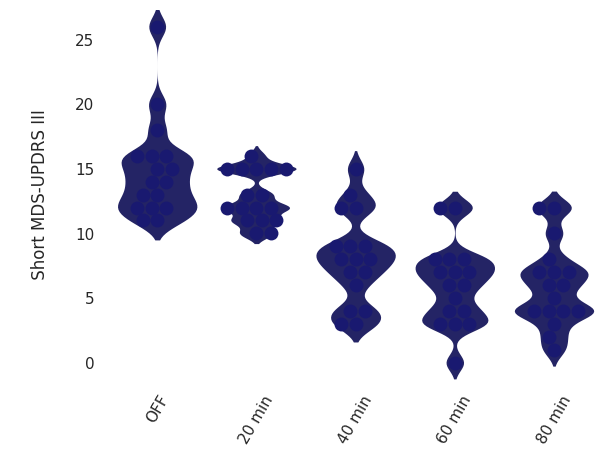

In [11]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Short_MDS-UPDRS_III", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Short_MDS-UPDRS_III", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Short MDS-UPDRS III \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [12]:
pg.friedman(data=output_wide_clinical, dv="Short_MDS-UPDRS_III", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.855864,4,58.198758,6.931989e-12


In [13]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Short_MDS-UPDRS_III", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000e+00,0.232930,0.000176,9.898653e-07,0.000002
20min,2.329298e-01,1.000000,0.008040,4.132340e-05,0.000124
40min,1.757937e-04,0.008040,1.000000,1.052804e-01,0.196045
60min,9.898653e-07,0.000041,0.105280,1.000000e+00,0.700996
80min,2.234025e-06,0.000124,0.196045,7.009959e-01,1.000000


# AXIAL SCORE


In [14]:
output_wide_clinical.groupby("Group").describe()["Axial_Score"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,3.764706,1.437420,2.0,3.0,3.0,5.0,7.0
40min,17.0,2.941176,1.248529,1.0,2.0,3.0,4.0,5.0
60min,17.0,1.941176,1.028992,0.0,1.0,2.0,3.0,4.0
80min,17.0,1.882353,1.317306,0.0,1.0,2.0,3.0,5.0
OFF,17.0,5.058824,2.276801,2.0,4.0,4.0,6.0,10.0


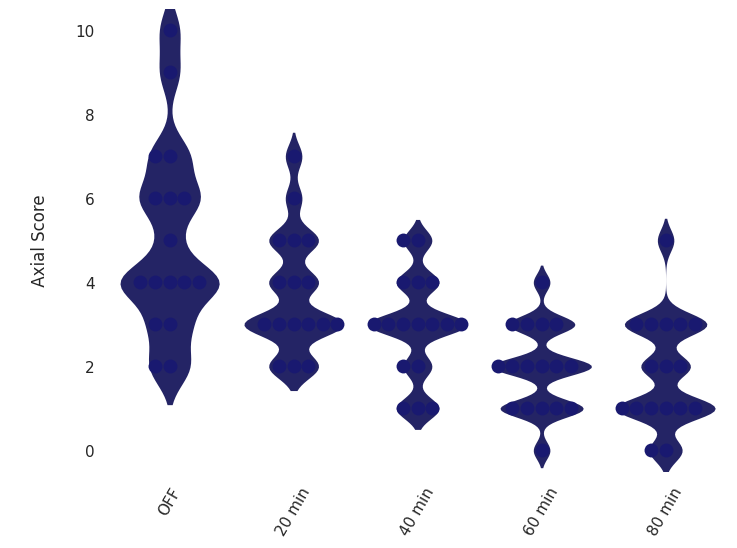

In [15]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Axial_Score", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Axial_Score", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Axial Score \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [16]:
pg.friedman(data=output_wide_clinical, dv="Axial_Score", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.729412,4,49.6,4.376395e-10


In [17]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Axial_Score", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.177562,0.004278,0.000003,0.000005
20min,0.177562,1.000000,0.100229,0.000223,0.000461
40min,0.004278,0.100229,1.000000,0.025705,0.045678
60min,0.000003,0.000223,0.025705,1.000000,0.767957
80min,0.000005,0.000461,0.045678,0.767957,1.000000


# Item 3.1


In [18]:
output_wide_clinical.groupby("Group").describe()["Item_3.1"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,1.705882,0.685994,1.0,1.0,2.0,2.0,3.0
40min,17.0,1.529412,0.717430,1.0,1.0,1.0,2.0,3.0
60min,17.0,1.294118,0.685994,0.0,1.0,1.0,2.0,3.0
80min,17.0,1.117647,0.857493,0.0,1.0,1.0,1.0,3.0
OFF,17.0,1.941176,0.747545,1.0,1.0,2.0,2.0,3.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


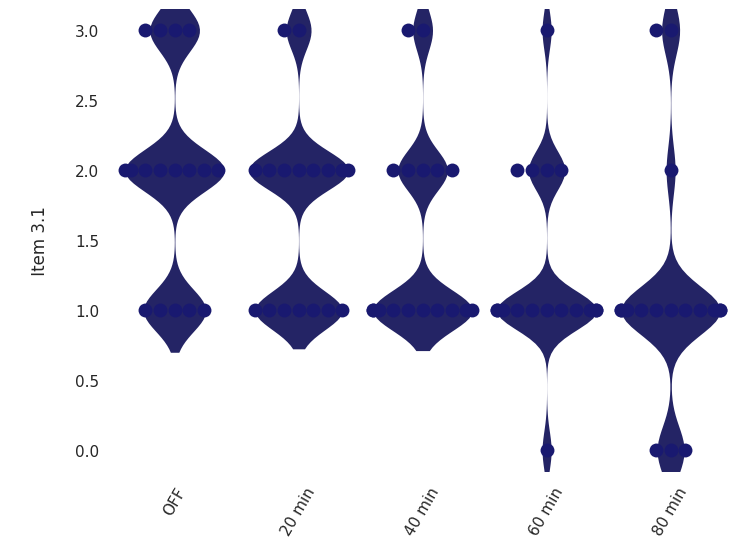

In [19]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.1", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.1", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.1 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [20]:
pg.friedman(data=output_wide_clinical, dv="Item_3.1", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.386404,4,26.275449,0.000028


In [21]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.1", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.237475,0.037146,0.001181,0.000361
20min,0.237475,1.000000,0.310437,0.031150,0.009121
40min,0.037146,0.310437,1.000000,0.205190,0.078227
60min,0.001181,0.031150,0.205190,1.000000,0.587329
80min,0.000361,0.009121,0.078227,0.587329,1.000000


# Item 3.3


In [22]:
output_wide_clinical.groupby("Group").describe()["Item_3.3"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,3.117647,0.696631,2.0,3.0,3.0,4.0,4.0
40min,17.0,2.235294,1.200490,0.0,2.0,2.0,3.0,4.0
60min,17.0,1.705882,1.104802,0.0,1.0,2.0,2.0,4.0
80min,17.0,1.117647,1.317306,0.0,0.0,1.0,2.0,4.0
OFF,17.0,3.294118,0.685994,2.0,3.0,3.0,4.0,5.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


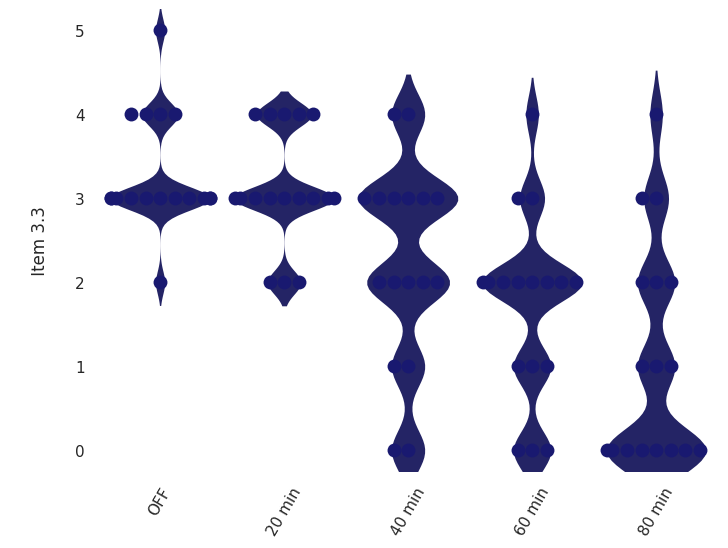

In [23]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.3", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.3", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.3 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [24]:
pg.friedman(data=output_wide_clinical, dv="Item_3.3", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.732341,4,49.799197,3.976810e-10


In [25]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.3", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.415697,0.005960,0.000027,0.000003
20min,0.415697,1.000000,0.038102,0.000373,0.000027
40min,0.005960,0.038102,1.000000,0.103026,0.017031
60min,0.000027,0.000373,0.103026,1.000000,0.415697
80min,0.000003,0.000027,0.017031,0.415697,1.000000


# Item 3.4


In [26]:
output_wide_clinical.groupby("Group").describe()["Item_3.4"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,3.294118,0.469668,3.0,3.0,3.0,4.0,4.0
40min,17.0,2.764706,1.032558,1.0,2.0,3.0,3.0,4.0
60min,17.0,2.294118,1.159995,0.0,1.0,3.0,3.0,4.0
80min,17.0,2.411765,0.870260,1.0,2.0,3.0,3.0,4.0
OFF,17.0,3.470588,0.514496,3.0,3.0,3.0,4.0,4.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


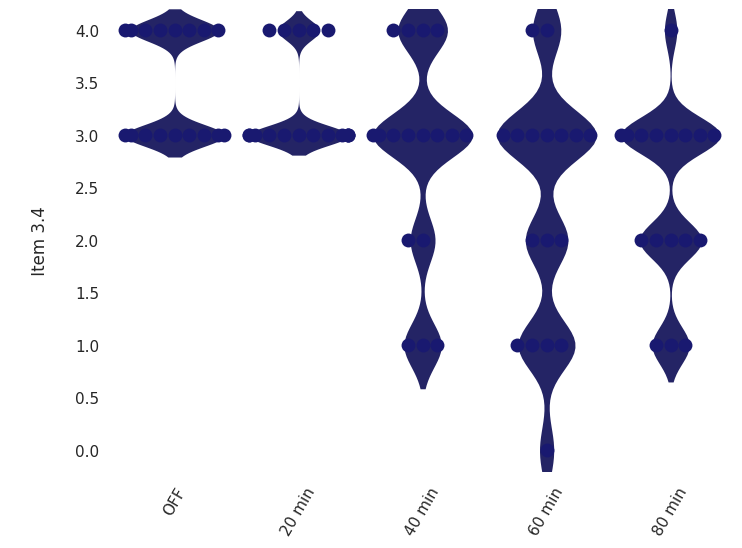

In [27]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.4", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.4", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.4 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [28]:
pg.friedman(data=output_wide_clinical, dv="Item_3.4", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.466631,4,31.730942,0.000002


In [29]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.4", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.562906,0.032282,0.000410,0.000410
20min,0.562906,1.000000,0.108650,0.001636,0.001881
40min,0.032282,0.108650,1.000000,0.108650,0.109115
60min,0.000410,0.001636,0.108650,1.000000,0.894158
80min,0.000410,0.001881,0.109115,0.894158,1.000000


# Item 3.8


In [30]:
output_wide_clinical.groupby("Group").describe()["Item_3.8"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,2.823529,1.014599,1.0,3.0,3.0,3.0,4.0
40min,17.0,1.470588,1.462773,0.0,0.0,1.0,3.0,4.0
60min,17.0,0.941176,1.248529,0.0,0.0,0.0,2.0,4.0
80min,17.0,1.058824,1.712841,0.0,0.0,0.0,3.0,4.0
OFF,17.0,3.117647,0.857493,1.0,3.0,3.0,4.0,4.0


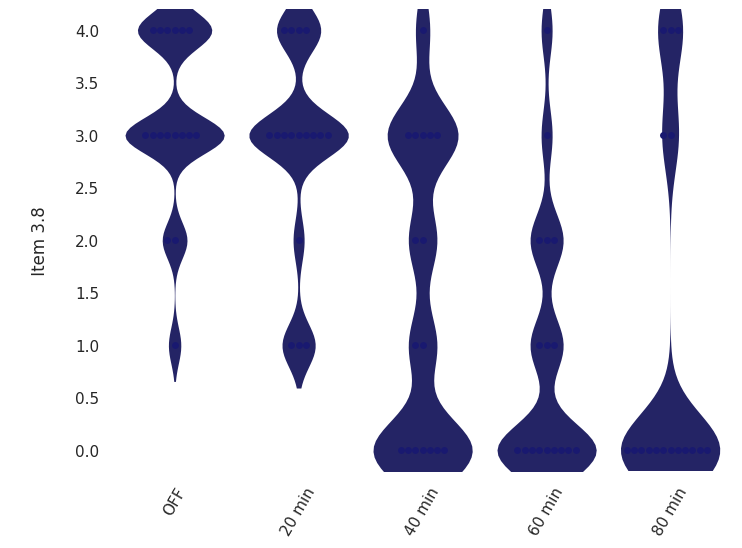

In [31]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.8", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.8", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 5, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.8 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [32]:
pg.friedman(data=output_wide_clinical, dv="Item_3.8", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.607103,4,41.283019,2.348518e-08


In [33]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.8", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.518774,0.000843,0.000059,0.000140
20min,0.518774,1.000000,0.006619,0.000336,0.000843
40min,0.000843,0.006619,1.000000,0.358316,0.518774
60min,0.000059,0.000336,0.358316,1.000000,0.670851
80min,0.000140,0.000843,0.518774,0.670851,1.000000


# Item 3.10


In [34]:
output_wide_clinical.groupby("Group").describe()["Item_3.10"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,1.529412,0.717430,0.0,1.0,2.0,2.0,2.0
40min,17.0,1.058824,0.658653,0.0,1.0,1.0,1.0,2.0
60min,17.0,0.529412,0.624264,0.0,0.0,0.0,1.0,2.0
80min,17.0,0.352941,0.606339,0.0,0.0,0.0,1.0,2.0
OFF,17.0,2.000000,0.612372,1.0,2.0,2.0,2.0,3.0


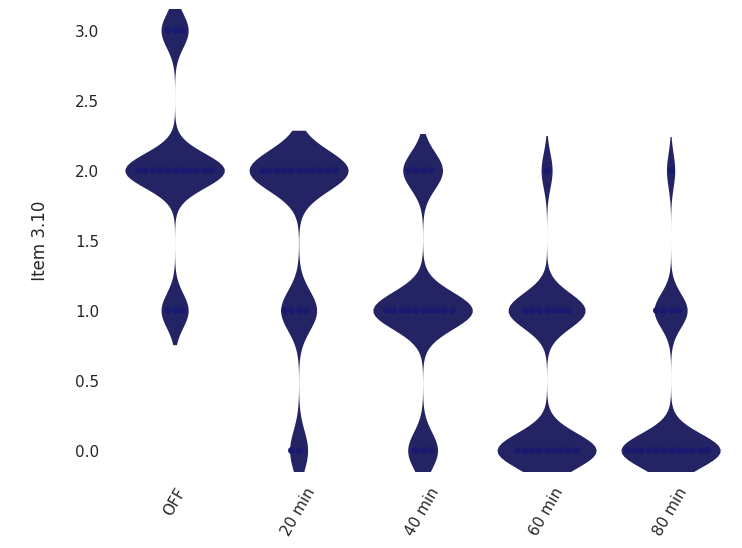

In [35]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.10", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.10", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 5, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.10 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [36]:
pg.friedman(data=output_wide_clinical, dv="Item_3.10", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.629654,4,42.816479,1.129607e-08


In [37]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.10", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.166348,0.006897,0.000025,0.000010
20min,0.166348,1.000000,0.148920,0.001979,0.000660
40min,0.006897,0.148920,1.000000,0.080405,0.034745
60min,0.000025,0.001979,0.080405,1.000000,0.672067
80min,0.000010,0.000660,0.034745,0.672067,1.000000


# Item 3.11


In [38]:
output_wide_clinical.groupby("Group").describe()["Item_3.11"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.823529,1.185079,0.0,0.0,0.0,2.0,3.0
40min,17.0,0.294118,0.469668,0.0,0.0,0.0,1.0,1.0
60min,17.0,0.117647,0.485071,0.0,0.0,0.0,0.0,2.0
80min,17.0,0.235294,0.664211,0.0,0.0,0.0,0.0,2.0
OFF,17.0,1.117647,1.218726,0.0,0.0,1.0,2.0,3.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


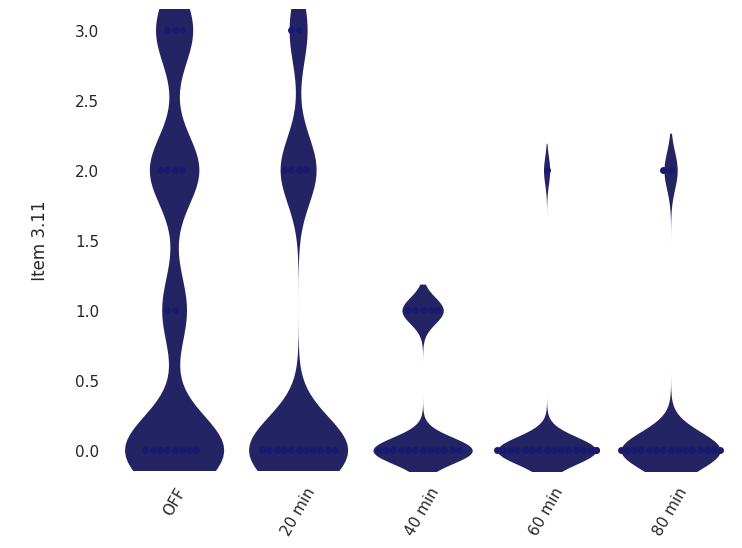

In [39]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.11", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.11", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 5, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.11 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [40]:
pg.friedman(data=output_wide_clinical, dv="Item_3.11", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.335201,4,22.793651,0.000139


In [41]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.11", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.181943,0.002477,0.001234,0.002477
20min,0.181943,1.000000,0.083104,0.033448,0.083104
40min,0.002477,0.083104,1.000000,0.652811,1.000000
60min,0.001234,0.033448,0.652811,1.000000,0.652811
80min,0.002477,0.083104,1.000000,0.652811,1.000000


# Item 3.12


In [42]:
output_wide_clinical.groupby("Group").describe()["Item_3.12"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.647059,0.996317,0.0,0.0,0.0,1.0,3.0
40min,17.0,0.470588,0.799816,0.0,0.0,0.0,1.0,3.0
60min,17.0,0.294118,0.771744,0.0,0.0,0.0,0.0,3.0
80min,17.0,0.529412,1.007326,0.0,0.0,0.0,1.0,3.0
OFF,17.0,1.352941,1.455214,0.0,0.0,1.0,3.0,3.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


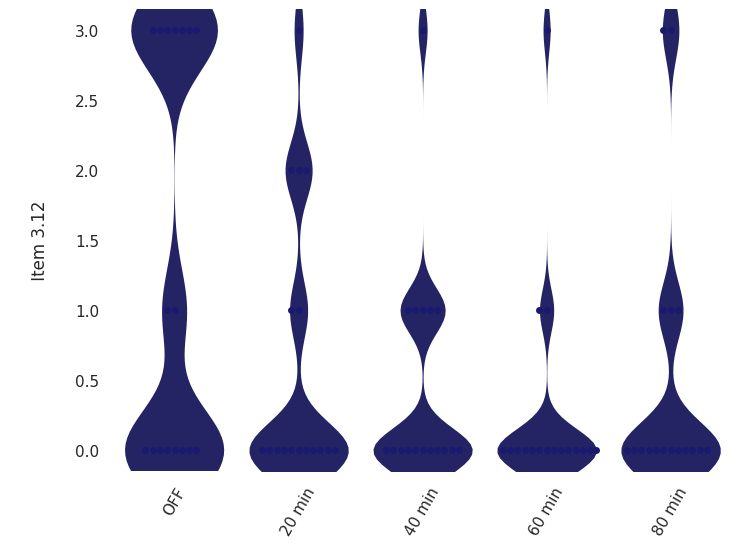

In [43]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.12", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.12", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 5, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.12 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [44]:
pg.friedman(data=output_wide_clinical, dv="Item_3.12", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.181373,4,12.333333,0.015037


In [45]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.12", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.098740,0.049187,0.015138,0.049187
20min,0.098740,1.000000,0.763771,0.459421,0.763771
40min,0.049187,0.763771,1.000000,0.670725,0.935817
60min,0.015138,0.459421,0.670725,1.000000,0.670725
80min,0.049187,0.763771,0.935817,0.670725,1.000000


# Item 3.15


In [46]:
output_wide_clinical.groupby("Group").describe()["Item_3.15"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.941176,1.197424,0.0,0.0,0.0,2.0,3.0
40min,17.0,0.294118,0.771744,0.0,0.0,0.0,0.0,3.0
60min,17.0,0.352941,0.785905,0.0,0.0,0.0,0.0,3.0
80min,17.0,0.294118,0.685994,0.0,0.0,0.0,0.0,2.0
OFF,17.0,0.823529,1.014599,0.0,0.0,0.0,2.0,3.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


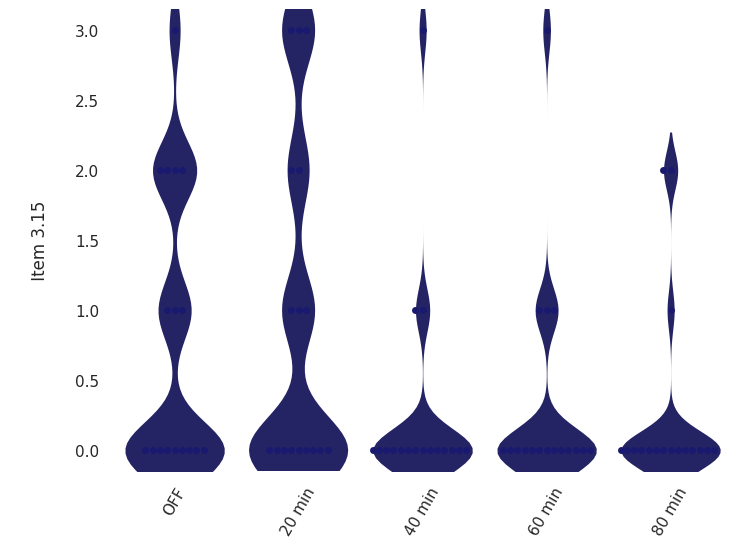

In [47]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.15", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.15", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 5, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.15 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [48]:
pg.friedman(data=output_wide_clinical, dv="Item_3.15", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.348961,4,23.729323,0.00009


In [49]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.15", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.792180,0.009921,0.017071,0.005899
20min,0.792180,1.000000,0.005899,0.007472,0.004442
40min,0.009921,0.005899,1.000000,0.792180,0.792180
60min,0.017071,0.007472,0.792180,1.000000,0.770265
80min,0.005899,0.004442,0.792180,0.770265,1.000000


# Item 3.17


In [50]:
output_wide_clinical.groupby("Group").describe()["Item_3.17"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.764706,0.970143,0.0,0.0,0.0,1.0,3.0
40min,17.0,0.176471,0.528594,0.0,0.0,0.0,0.0,2.0
60min,17.0,0.235294,0.752447,0.0,0.0,0.0,0.0,3.0
80min,17.0,0.235294,0.562296,0.0,0.0,0.0,0.0,2.0
OFF,17.0,1.176471,1.286239,0.0,0.0,1.0,2.0,3.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


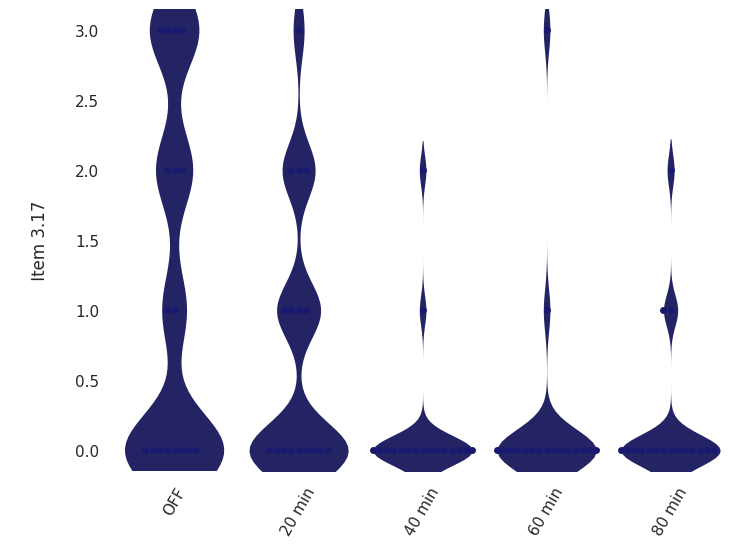

In [51]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.17", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.17", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 5, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.17 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [52]:
pg.friedman(data=output_wide_clinical, dv="Item_3.17", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.347019,4,23.597315,0.000096


In [53]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.17", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.270716,0.001794,0.002322,0.002322
20min,0.270716,1.000000,0.025170,0.047859,0.047859
40min,0.001794,0.025170,1.000000,0.755499,0.755499
60min,0.002322,0.047859,0.755499,1.000000,1.000000
80min,0.002322,0.047859,0.755499,1.000000,1.000000


# OFF vs Best ON: Clinical Score
# _____________________________________________________________________________________

In [56]:
BestON_output_wide_clinical = pd.read_csv('BestON_output_wide_clinical.csv', sep = ',')

In [57]:
BestON_output_wide_clinical

,patient,Axial_OFF,Axial_BestON,Tremor_OFF,Tremor_BestON,Rigidity_OFF,Rigidity_BestON,Akinesia_OFF,Akinesia_BestON,MDS_UPDRS_I_OFF,MDS_UPDRS_I_BestON,MDS_UPDRS_II_OFF,MDS_UPDRS_II_BestON,MDS_UPDRS_III_OFF,MDS_UPDRS_III_BestON
0,A,7,1,0,0,9,4,21,4,3,3,7,0,43,10
1,B,4,0,3,0,8,0,19,3,4,4,16,5,39,5
2,C,6,3,0,0,7,2,16,10,11,7,19,12,31,15
3,D,6,2,1,0,6,3,12,6,6,4,16,3,28,12
4,E,6,2,2,0,3,1,11,4,7,7,9,5,24,8
5,F,9,1,4,1,8,3,15,4,10,5,25,1,41,11
6,G,7,2,0,0,7,4,17,11,12,7,19,3,34,18
7,H,3,1,0,0,8,4,15,5,15,8,14,4,27,12
8,I,2,1,4,1,7,4,12,6,3,3,1,0,28,13
9,J,2,1,3,2,4,3,14,6,4,4,7,2,25,12


In [58]:
list(BestON_output_wide_clinical)


['patient',
 'Axial_OFF',
 'Axial_BestON',
 'Tremor_OFF',
 'Tremor_BestON',
 'Rigidity_OFF',
 'Rigidity_BestON',
 'Akinesia_OFF',
 'Akinesia_BestON',
 'MDS_UPDRS_I_OFF',
 'MDS_UPDRS_I_BestON',
 'MDS_UPDRS_II_OFF',
 'MDS_UPDRS_II_BestON',
 'MDS_UPDRS_III_OFF',
 'MDS_UPDRS_III_BestON']

# MDS-UPDRS III

In [59]:
BestON_output_wide_clinical[['MDS_UPDRS_III_OFF','MDS_UPDRS_III_BestON']].describe()

,MDS_UPDRS_III_OFF,MDS_UPDRS_III_BestON
count,17.000000,17.00000
mean,34.176471,15.00000
std,7.468562,5.91608
min,24.000000,5.00000
25%,28.000000,12.00000
50%,32.000000,13.00000
75%,39.000000,19.00000
max,53.000000,27.00000


In [60]:
stats.wilcoxon(BestON_output_wide_clinical['MDS_UPDRS_III_OFF'], BestON_output_wide_clinical['MDS_UPDRS_III_BestON'])

WilcoxonResult(statistic=0.0, pvalue=1.52587890625e-05)

In [61]:
df1 = BestON_output_wide_clinical[['patient', 'MDS_UPDRS_III_OFF','MDS_UPDRS_III_BestON']]
df1 = df1.set_index('patient').stack().reset_index()
df1.columns = ['patient','Group','UPDRS_III']
print (df1)

   patient                 Group  UPDRS_III
0        A     MDS_UPDRS_III_OFF         43
1        A  MDS_UPDRS_III_BestON         10
2        B     MDS_UPDRS_III_OFF         39
3        B  MDS_UPDRS_III_BestON          5
4        C     MDS_UPDRS_III_OFF         31
5        C  MDS_UPDRS_III_BestON         15
6        D     MDS_UPDRS_III_OFF         28
7        D  MDS_UPDRS_III_BestON         12
8        E     MDS_UPDRS_III_OFF         24
9        E  MDS_UPDRS_III_BestON          8
10       F     MDS_UPDRS_III_OFF         41
11       F  MDS_UPDRS_III_BestON         11
12       G     MDS_UPDRS_III_OFF         34
13       G  MDS_UPDRS_III_BestON         18
14       H     MDS_UPDRS_III_OFF         27
15       H  MDS_UPDRS_III_BestON         12
16       I     MDS_UPDRS_III_OFF         28
17       I  MDS_UPDRS_III_BestON         13
18       J     MDS_UPDRS_III_OFF         25
19       J  MDS_UPDRS_III_BestON         12
20       K     MDS_UPDRS_III_OFF         32
21       K  MDS_UPDRS_III_BestON

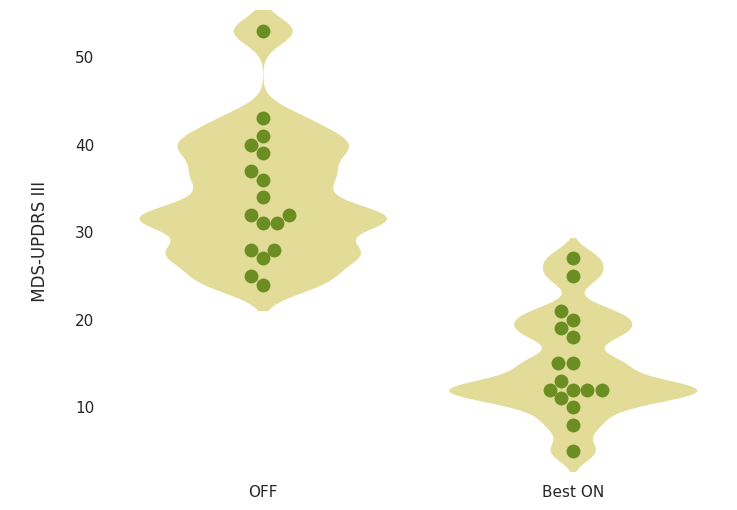

In [62]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="UPDRS_III", data=df1, color="khaki",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "UPDRS_III", x = "Group", data = df1, color="olivedrab", edgecolor = "olivedrab", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n MDS-UPDRS III \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
ax.set_xticklabels(['OFF', 'Best ON'])

sns.set(rc={'figure.figsize':(5,5)})
sns.despine(left=True, bottom=True)

# Axial Score

In [63]:
BestON_output_wide_clinical[['Axial_OFF','Axial_BestON']].describe()

,Axial_OFF,Axial_BestON
count,17.000000,17.000000
mean,5.058824,1.823529
std,2.276801,1.185079
min,2.000000,0.000000
25%,4.000000,1.000000
50%,4.000000,2.000000
75%,6.000000,2.000000
max,10.000000,5.000000


In [64]:
stats.wilcoxon(BestON_output_wide_clinical['Axial_OFF'], BestON_output_wide_clinical['Axial_BestON'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=0.0, pvalue=0.0004196398347775274)

In [65]:
df1 = BestON_output_wide_clinical[['patient', 'Axial_OFF','Axial_BestON']]
df1 = df1.set_index('patient').stack().reset_index()
df1.columns = ['patient','Group','Axial Score']
print (df1)

   patient         Group  Axial Score
0        A     Axial_OFF            7
1        A  Axial_BestON            1
2        B     Axial_OFF            4
3        B  Axial_BestON            0
4        C     Axial_OFF            6
5        C  Axial_BestON            3
6        D     Axial_OFF            6
7        D  Axial_BestON            2
8        E     Axial_OFF            6
9        E  Axial_BestON            2
10       F     Axial_OFF            9
11       F  Axial_BestON            1
12       G     Axial_OFF            7
13       G  Axial_BestON            2
14       H     Axial_OFF            3
15       H  Axial_BestON            1
16       I     Axial_OFF            2
17       I  Axial_BestON            1
18       J     Axial_OFF            2
19       J  Axial_BestON            1
20       K     Axial_OFF            4
21       K  Axial_BestON            1
22       L     Axial_OFF            4
23       L  Axial_BestON            2
24       M     Axial_OFF            5
25       M  

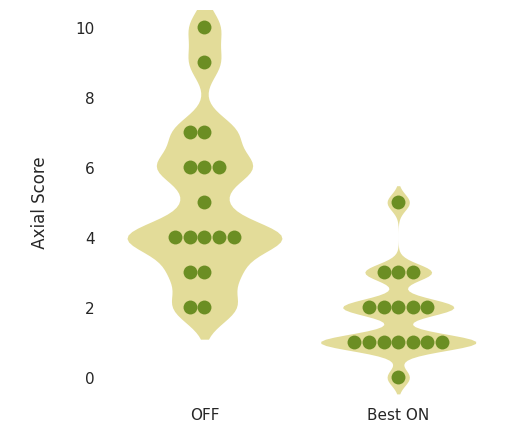

In [66]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Axial Score", data=df1, color="khaki",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Axial Score", x = "Group", data = df1, color="olivedrab", edgecolor = "olivedrab", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Axial Score \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
ax.set_xticklabels(['OFF', 'Best ON'])

sns.set(rc={'figure.figsize':(5,5)})
sns.despine(left=True, bottom=True)

# Tremor Score

In [67]:
BestON_output_wide_clinical[['Tremor_OFF','Tremor_BestON']].describe()

,Tremor_OFF,Tremor_BestON
count,17.000000,17.000000
mean,1.764706,0.588235
std,1.640481,0.939336
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,1.000000
max,4.000000,3.000000


In [68]:
stats.wilcoxon(BestON_output_wide_clinical['Tremor_OFF'], BestON_output_wide_clinical['Tremor_BestON'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=0.0, pvalue=0.0029250200956793355)

In [69]:
df1 = BestON_output_wide_clinical[['patient', 'Tremor_OFF','Tremor_BestON']]
df1 = df1.set_index('patient').stack().reset_index()
df1.columns = ['patient','Group','Tremor Score']
print (df1)

   patient          Group  Tremor Score
0        A     Tremor_OFF             0
1        A  Tremor_BestON             0
2        B     Tremor_OFF             3
3        B  Tremor_BestON             0
4        C     Tremor_OFF             0
5        C  Tremor_BestON             0
6        D     Tremor_OFF             1
7        D  Tremor_BestON             0
8        E     Tremor_OFF             2
9        E  Tremor_BestON             0
10       F     Tremor_OFF             4
11       F  Tremor_BestON             1
12       G     Tremor_OFF             0
13       G  Tremor_BestON             0
14       H     Tremor_OFF             0
15       H  Tremor_BestON             0
16       I     Tremor_OFF             4
17       I  Tremor_BestON             1
18       J     Tremor_OFF             3
19       J  Tremor_BestON             2
20       K     Tremor_OFF             0
21       K  Tremor_BestON             0
22       L     Tremor_OFF             2
23       L  Tremor_BestON             1


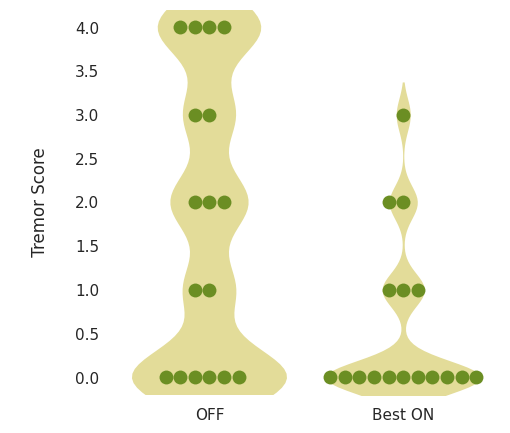

In [70]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Tremor Score", data=df1, color="khaki",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Tremor Score", x = "Group", data = df1, color="olivedrab", edgecolor = "olivedrab", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Tremor Score \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
ax.set_xticklabels(['OFF', 'Best ON'])

sns.set(rc={'figure.figsize':(5,5)})
sns.despine(left=True, bottom=True)

# Rigidity Score

In [71]:
BestON_output_wide_clinical[['Rigidity_OFF','Rigidity_BestON']].describe()

,Rigidity_OFF,Rigidity_BestON
count,17.00000,17.000000
mean,7.00000,3.352941
std,2.03101,1.966633
min,3.00000,0.000000
25%,6.00000,3.000000
50%,8.00000,3.000000
75%,8.00000,4.000000
max,10.00000,7.000000


In [72]:
stats.wilcoxon(BestON_output_wide_clinical['Rigidity_OFF'], BestON_output_wide_clinical['Rigidity_BestON'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=0.0, pvalue=0.00039931161609927973)

In [73]:
df1 = BestON_output_wide_clinical[['patient', 'Rigidity_OFF','Rigidity_BestON']]
df1 = df1.set_index('patient').stack().reset_index()
df1.columns = ['patient','Group','Rigidity Score']
print (df1)

   patient            Group  Rigidity Score
0        A     Rigidity_OFF               9
1        A  Rigidity_BestON               4
2        B     Rigidity_OFF               8
3        B  Rigidity_BestON               0
4        C     Rigidity_OFF               7
5        C  Rigidity_BestON               2
6        D     Rigidity_OFF               6
7        D  Rigidity_BestON               3
8        E     Rigidity_OFF               3
9        E  Rigidity_BestON               1
10       F     Rigidity_OFF               8
11       F  Rigidity_BestON               3
12       G     Rigidity_OFF               7
13       G  Rigidity_BestON               4
14       H     Rigidity_OFF               8
15       H  Rigidity_BestON               4
16       I     Rigidity_OFF               7
17       I  Rigidity_BestON               4
18       J     Rigidity_OFF               4
19       J  Rigidity_BestON               3
20       K     Rigidity_OFF               9
21       K  Rigidity_BestON     

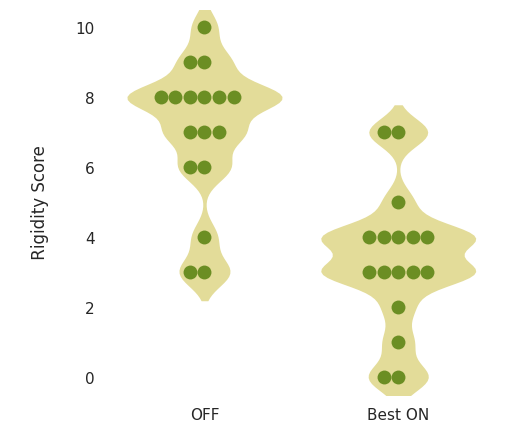

In [74]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Rigidity Score", data=df1, color="khaki",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Rigidity Score", x = "Group", data = df1, color="olivedrab", edgecolor = "olivedrab", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Rigidity Score \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
ax.set_xticklabels(['OFF', 'Best ON'])

sns.set(rc={'figure.figsize':(5,5)})
sns.despine(left=True, bottom=True)

# Akinesia Score

In [75]:
BestON_output_wide_clinical[['Akinesia_OFF','Akinesia_BestON']].describe()

,Akinesia_OFF,Akinesia_BestON
count,17.000000,17.000000
mean,16.882353,8.176471
std,4.106129,4.231361
min,11.000000,3.000000
25%,14.000000,5.000000
50%,16.000000,6.000000
75%,21.000000,11.000000
max,24.000000,17.000000


In [76]:
stats.wilcoxon(BestON_output_wide_clinical['Akinesia_OFF'], BestON_output_wide_clinical['Akinesia_BestON'])

WilcoxonResult(statistic=0.0, pvalue=1.52587890625e-05)

In [77]:
df1 = BestON_output_wide_clinical[['patient', 'Akinesia_OFF','Akinesia_BestON']]
df1 = df1.set_index('patient').stack().reset_index()
df1.columns = ['patient','Group','Akinesia Score']
print (df1)

   patient            Group  Akinesia Score
0        A     Akinesia_OFF              21
1        A  Akinesia_BestON               4
2        B     Akinesia_OFF              19
3        B  Akinesia_BestON               3
4        C     Akinesia_OFF              16
5        C  Akinesia_BestON              10
6        D     Akinesia_OFF              12
7        D  Akinesia_BestON               6
8        E     Akinesia_OFF              11
9        E  Akinesia_BestON               4
10       F     Akinesia_OFF              15
11       F  Akinesia_BestON               4
12       G     Akinesia_OFF              17
13       G  Akinesia_BestON              11
14       H     Akinesia_OFF              15
15       H  Akinesia_BestON               5
16       I     Akinesia_OFF              12
17       I  Akinesia_BestON               6
18       J     Akinesia_OFF              14
19       J  Akinesia_BestON               6
20       K     Akinesia_OFF              15
21       K  Akinesia_BestON     

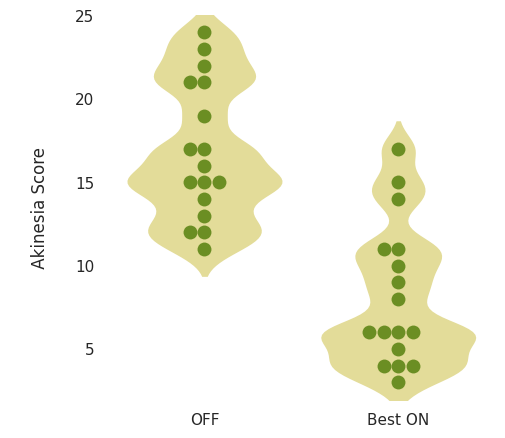

In [78]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Akinesia Score", data=df1, color="khaki",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Akinesia Score", x = "Group", data = df1, color="olivedrab", edgecolor = "olivedrab", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Akinesia Score \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
ax.set_xticklabels(['OFF', 'Best ON'])

sns.set(rc={'figure.figsize':(5,5)})
sns.despine(left=True, bottom=True)